EDA Untuk CHallenge

-File data yang udah diolah disimpan dalam folder docs
-Kata.csv adalah file untuk kompulan kata bersifat abusive
-data_clean.db adalah database yang pakai untuk menyimpan file hasil clean dan juga analisis sentimen (hasil analisis sentimen disimpan kedalam database untuk mempercepat proses pengolahan)


Referensi :

https://swagger.io/docs/specification/describing-parameters/
https://swagger.io/docs/specification/2-0/file-upload/

Sentiment analysis data Twitter menggunakan algoritma native Bates, decision tree dan K-NN https://www.youtube.com/watch?v=Wvq_R51sAPg&t=10s

Cleaning data Twitter melalui python jupyter notebook https://www.youtube.com/watch?v=r3_X44Bn9gI&t=475s

Tutorial data cleansing dengan Python https://www.youtube.com/watch?v=hPytM9T_WQo&t=179s

How to Easily Create REST APIs with Flask-RESTX https://www.youtube.com/watch?v=Qf0wri9MvMY&t=988s

How to Upload, Process, and Download CSV Files in Flask apps https://www.youtube.com/watch?v=BP8ulGbu1fc&t=294s

Belajar Data Science [Project] - #04 Data Cleaning https://www.youtube.com/watch?v=aX4nOfvSU-k

How to Upload, Process, and Download CSV Files in Flask apps https://www.youtube.com/watch?v=BP8ulGbu1fc

https://hub.packtpub.com/clean-social-media-data-analysis-python/
https://nzlul.medium.com/data-cleansing-using-python-case-imdb-dataset-eac5aaee293e
https://naura-lab.blogspot.com/2015/02/membuat-database-di-sqlite.html
https://www.dataknowsall.com/textcleaning.html
https://towardsdatascience.com/regex-essential-for-nlp-ee0336ef988d
https://github.com/PrettyPrinted/youtube_video_code/commit/4dfa129a9204146935395e5892f489207e21a5de



In [1]:
import pandas as pd
import re
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
file_path = r'C:\Users\ekopu\binar-data-science\binar-data-science\docs'
abusive=pd.read_csv(file_path+'\kata.csv')

In [3]:
cnx = sqlite3.connect('data_clean.db')

df = pd.read_sql_query("SELECT cleaned_text FROM cleaned_data", cnx)


In [5]:
cursor = cnx.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

tables = cursor.fetchall()


for table in tables:
    print(table[0])



cleaned_data


In [ ]:
SCRIPT UNTUK MENGHAPUS Tabel proses analisis yang sudah pernah dilakukan  

In [5]:
# Nama tabel yang akan dihapus
cnx = sqlite3.connect('data_clean.db')
nama_tabel = 'proses_analisis'
cursor = cnx.cursor()
# Perintah SQL untuk menghapus tabel
sql_query = f"DROP TABLE IF EXISTS {nama_tabel};"

# Eksekusi perintah SQL
cursor.execute(sql_query)

# Commit perubahan ke database
cnx.commit()

# Menutup koneksi
cnx.close()

In [6]:
df.head(10)

,cleaned_text
0,disaat semua cowok berusaha melacak perhatian ...
1,rt user user siapa yang telat ngasih tau elued...
2,41 kadang aku berfikir kenapa aku tetap percay...
3,user user aku itu akunnku tau matamu sipit tap...
4,user user kaum cebong kapir udah keliatan dong...
5,user ya bani taplak dkk
6,deklarasi pilkada 2018 aman dan anti hoax warg...
7,gue baru aja kelar rewatch aldnoah zero paling...
8,nah admin belanja satu lagi port terbaik nak m...
9,user enak lg klo smbil ngewe


In [7]:
df.tail()

,cleaned_text
13164,user jangan asal ngomong ndasmu congor lu yg s...
13165,user kasur mana enak kunyuk
13166,user hati hati bisu gnnlagi bosan huft
13167,user user user user bom yang real mudah terdet...
13168,user mana situ ngasih itu cuma foto ya kutil onta


In [8]:
file_path = r'C:\Users\ekopu\binar-data-science\binar-data-science\docs'
abusive=pd.read_csv(file_path+'\kata.csv')
# Menghubungkan ke database SQLite
cnx = sqlite3.connect('data_clean.db')

# Membaca data dari tabel 'cleaned_data' dalam database SQLite
twitclean = pd.read_sql_query("SELECT cleaned_text FROM cleaned_data", cnx)


In [ ]:
Proses Analisis Sentimen Untuk mendeteksi twit yang mengandung kata abusive, hasil analisis disimpan dalam tabel proese analisis 

In [9]:
def cek_kata(baris_twit):
    analisis = TextBlob(baris_twit)
    sentimen = analisis.sentiment.polarity
    kata_kata = baris_twit.split()
    dapat_kata = [kata for kata in kata_kata if kata in abusive['ABUSIVE'].values]
    return sentimen, dapat_kata

# Inisialisasi DataFrame results_df
results_df = pd.DataFrame(columns=["Isi Twit", "Jumlah Kata Abusive", "Kata Abusive"])

# Menghubungkan ke database SQLite untuk tabel hasil_analisis
cnx_analisis = sqlite3.connect('data_clean.db')

# Membuat tabel hasil_analisis (jika belum ada)
cursor = cnx_analisis.cursor()
cursor.execute('''
CREATE TABLE IF NOT EXISTS proses_analisis (
    id INTEGER PRIMARY KEY,
    isi_twit TEXT,
    jumlah_kata_abusive INTEGER,
    kata_abusive TEXT
)
''')
cnx_analisis.commit()

total_abusive_twit = 0


for index, baris_twit in enumerate(twitclean['cleaned_text']):
    sentimen, dapat_kata = cek_kata(baris_twit)

    idtwit = f"{index + 1}"
    isitwit = baris_twit
    jumlah_kata_abusive = len(dapat_kata)
    kata_abusive = ', '.join(dapat_kata) if jumlah_kata_abusive > 0 else '-'

    # Masukkan data ke dalam tabel hasil_analisis
    cursor.execute('''
    INSERT INTO proses_analisis (isi_twit, jumlah_kata_abusive, kata_abusive)
    VALUES (?, ?, ?)
    ''', (isitwit, jumlah_kata_abusive, kata_abusive))

# Commit perubahan ke database hasil_analisis
cnx_analisis.commit()

# Menutup koneksi database hasil_analisis
cnx_analisis.close()


In [11]:
df = pd.read_sql_query("SELECT * FROM proses_analisis", cnx)
df

,id,isi_twit,jumlah_kata_abusive,kata_abusive
0,1,disaat semua cowok berusaha melacak perhatian ...,1,bego
1,2,rt user user siapa yang telat ngasih tau elued...,1,sarap
2,3,41 kadang aku berfikir kenapa aku tetap percay...,0,-
3,4,user user aku itu akunnku tau matamu sipit tap...,1,sipit
4,5,user user kaum cebong kapir udah keliatan dong...,2,"cebong, dongok"
...,...,...,...,...
13164,13165,user jangan asal ngomong ndasmu congor lu yg s...,1,congor
13165,13166,user kasur mana enak kunyuk,1,kunyuk
13166,13167,user hati hati bisu gnnlagi bosan huft,1,bisu
13167,13168,user user user user bom yang real mudah terdet...,0,-


In [12]:
df.describe()

,id,jumlah_kata_abusive
count,13169.000000,13169.000000
mean,6585.000000,0.630951
std,3801.707182,0.809761
min,1.000000,0.000000
25%,3293.000000,0.000000
50%,6585.000000,0.000000
75%,9877.000000,1.000000
max,13169.000000,15.000000


In [13]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13164    False
13165    False
13166    False
13167    False
13168    False
Length: 13169, dtype: bool

In [14]:
df.isna()

,id,isi_twit,jumlah_kata_abusive,kata_abusive
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
13164,False,False,False,False
13165,False,False,False,False
13166,False,False,False,False
13167,False,False,False,False


In [15]:
df.isna().sum()

id                     0
isi_twit               0
jumlah_kata_abusive    0
kata_abusive           0
dtype: int64

In [16]:
df.isna().sum()/df.shape[0]

id                     0.0
isi_twit               0.0
jumlah_kata_abusive    0.0
kata_abusive           0.0
dtype: float64

In [17]:
# Menambahkan kolom baru yang berisi total karakter di setiap twit
df['total_char'] = df.isi_twit.apply(len)

In [18]:
df.head()

,id,isi_twit,jumlah_kata_abusive,kata_abusive,total_char
0,1,disaat semua cowok berusaha melacak perhatian ...,1,bego,127
1,2,rt user user siapa yang telat ngasih tau elued...,1,sarap,117
2,3,41 kadang aku berfikir kenapa aku tetap percay...,0,-,247
3,4,user user aku itu akunnku tau matamu sipit tap...,1,sipit,72
4,5,user user kaum cebong kapir udah keliatan dong...,2,"cebong, dongok",88


In [19]:
# Menambahkan kolom baru yang berisi total kata di setiap twit
df["total_word"] = df.isi_twit.apply(lambda sent: len(sent.split()))
df

,id,isi_twit,jumlah_kata_abusive,kata_abusive,total_char,total_word
0,1,disaat semua cowok berusaha melacak perhatian ...,1,bego,127,21
1,2,rt user user siapa yang telat ngasih tau elued...,1,sarap,117,21
2,3,41 kadang aku berfikir kenapa aku tetap percay...,0,-,247,37
3,4,user user aku itu akunnku tau matamu sipit tap...,1,sipit,72,14
4,5,user user kaum cebong kapir udah keliatan dong...,2,"cebong, dongok",88,14
...,...,...,...,...,...,...
13164,13165,user jangan asal ngomong ndasmu congor lu yg s...,1,congor,59,10
13165,13166,user kasur mana enak kunyuk,1,kunyuk,27,5
13166,13167,user hati hati bisu gnnlagi bosan huft,1,bisu,38,7
13167,13168,user user user user bom yang real mudah terdet...,0,-,134,22


In [20]:
cek = ['total_word', 'total_char']
df[cek].mean()

total_word     16.927026
total_char    105.649024
dtype: float64

In [21]:
df[cek].describe()

,total_word,total_char
count,13169.000000,13169.000000
mean,16.927026,105.649024
std,10.040089,64.788305
min,1.000000,4.000000
25%,9.000000,54.000000
50%,15.000000,93.000000
75%,23.000000,138.000000
max,52.000000,324.000000


In [22]:
range_word=df.total_word.max()-df.total_word.min()
range_word

51

In [23]:
range_char=df.total_char.max()-df.total_char.min()
range_char

320

In [24]:
#Membuat visualisasi untuk melihat kata-kata abusive yang paling sering digunakan
from wordcloud import WordCloud
text=" ".join(df['kata_abusive'])
wordcloud=WordCloud().generate(text)

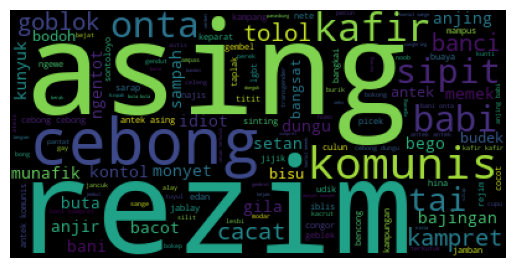

In [25]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [41]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
#referensi https://medium.com/mandiri-engineering/text-preprocessing-tahap-awal-dalam-natural-language-processing-nlp-bc5fbb6606a
import nltk

In [27]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def word(cleaned_text):
    return word_tokenize(cleaned_text)
df['text_token'] = df['isi_twit'].apply(word)
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ekopu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,isi_twit,jumlah_kata_abusive,kata_abusive,total_char,total_word,text_token
0,1,disaat semua cowok berusaha melacak perhatian ...,1,bego,127,21,"[disaat, semua, cowok, berusaha, melacak, perh..."
1,2,rt user user siapa yang telat ngasih tau elued...,1,sarap,117,21,"[rt, user, user, siapa, yang, telat, ngasih, t..."
2,3,41 kadang aku berfikir kenapa aku tetap percay...,0,-,247,37,"[41, kadang, aku, berfikir, kenapa, aku, tetap..."
3,4,user user aku itu akunnku tau matamu sipit tap...,1,sipit,72,14,"[user, user, aku, itu, akunnku, tau, matamu, s..."
4,5,user user kaum cebong kapir udah keliatan dong...,2,"cebong, dongok",88,14,"[user, user, kaum, cebong, kapir, udah, keliat..."
...,...,...,...,...,...,...,...
13164,13165,user jangan asal ngomong ndasmu congor lu yg s...,1,congor,59,10,"[user, jangan, asal, ngomong, ndasmu, congor, ..."
13165,13166,user kasur mana enak kunyuk,1,kunyuk,27,5,"[user, kasur, mana, enak, kunyuk]"
13166,13167,user hati hati bisu gnnlagi bosan huft,1,bisu,38,7,"[user, hati, hati, bisu, gnnlagi, bosan, huft]"
13167,13168,user user user user bom yang real mudah terdet...,0,-,134,22,"[user, user, user, user, bom, yang, real, muda..."


In [28]:
#menghilangkat kata-kata yang tidak terlalu di perlukan
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Unduh kamus kata-kata stop words Bahasa Indonesia
nltk.download('stopwords')
nltk.download('punkt')  # Unduh data tokenisasi

# Inisialisasi set stop words
wordlist = set(stopwords.words('indonesian'))

# Membuat set kata-kata tambahan
additional_stopwords = set([
    "yg", "dg", "rt", "dgn", "ny", "d", 'klo', 'kalo', 'amp',
    'biar', 'bikin', 'bilang', 'gak', 'ga', 'krn', 'nya', 'nih',
    'sih', 'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 'jd', 'jgn',
    'sdh', 'aja', 'n', 't', 'nyg', 'hehe', 'pen', 'u', 'nan',
    'loh', 'user', 'bukan', 'hanya', 'kata', 'gua', '&amp', 'yah'
    , 'orang', 'lu', 'url', 'gue', 'tp', 'gw', 'udah', 'lo', 'url'
    , 'dah', 'jg', 'org', 'emang', 'pake'
    , 'pa','ni','mah','iya','bgt','tu','gk','liat'
])

# Gabungkan set stop words NLTK dan set kata-kata tambahan
list_stopwords = wordlist.union(additional_stopwords)

# Buat DataFrame df sesuai dengan kebutuhan Anda

# Membuat fungsi untuk menghapus stop words
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

# Menggunakan word_tokenize untuk membagi teks menjadi token
tokenizer = word_tokenize
df['text_token'] = df['isi_twit'].apply(lambda text: tokenizer(text))

# Menghapus stop words dan kata-kata tambahan
df['text_remove_stopwords'] = df['text_token'].apply(stopwords_removal)

# Menggabungkan token-token menjadi satu string
df['text_remove_stopwords'] = df['text_remove_stopwords'].apply(lambda tokens: ' '.join(tokens))

# Tampilkan DataFrame yang telah diproses
df


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ekopu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ekopu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,isi_twit,jumlah_kata_abusive,kata_abusive,total_char,total_word,text_token,text_remove_stopwords
0,1,disaat semua cowok berusaha melacak perhatian ...,1,bego,127,21,"[disaat, semua, cowok, berusaha, melacak, perh...",disaat cowok berusaha melacak perhatian loe la...
1,2,rt user user siapa yang telat ngasih tau elued...,1,sarap,117,21,"[rt, user, user, siapa, yang, telat, ngasih, t...",telat ngasih eluedan sarap bergaul cigax jifla...
2,3,41 kadang aku berfikir kenapa aku tetap percay...,0,-,247,37,"[41, kadang, aku, berfikir, kenapa, aku, tetap...",41 kadang berfikir percaya tuhan jatuh berkali...
3,4,user user aku itu akunnku tau matamu sipit tap...,1,sipit,72,14,"[user, user, aku, itu, akunnku, tau, matamu, s...",akunnku matamu sipit diliat
4,5,user user kaum cebong kapir udah keliatan dong...,2,"cebong, dongok",88,14,"[user, user, kaum, cebong, kapir, udah, keliat...",kaum cebong kapir keliatan dongoknya dongok ha...
...,...,...,...,...,...,...,...,...
13164,13165,user jangan asal ngomong ndasmu congor lu yg s...,1,congor,59,10,"[user, jangan, asal, ngomong, ndasmu, congor, ...",ngomong ndasmu congor sekate2 anjyng
13165,13166,user kasur mana enak kunyuk,1,kunyuk,27,5,"[user, kasur, mana, enak, kunyuk]",kasur enak kunyuk
13166,13167,user hati hati bisu gnnlagi bosan huft,1,bisu,38,7,"[user, hati, hati, bisu, gnnlagi, bosan, huft]",hati hati bisu gnnlagi bosan huft
13167,13168,user user user user bom yang real mudah terdet...,0,-,134,22,"[user, user, user, user, bom, yang, real, muda...",bom real mudah terdeteksi bom terkubur dahsyat...


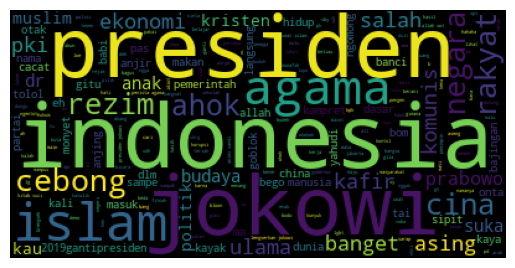

In [34]:
#mendeteksi kata-kata yang menjadi topik pembicaraan paling banyak dari data twit
text=" ".join(df['text_remove_stopwords'])
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

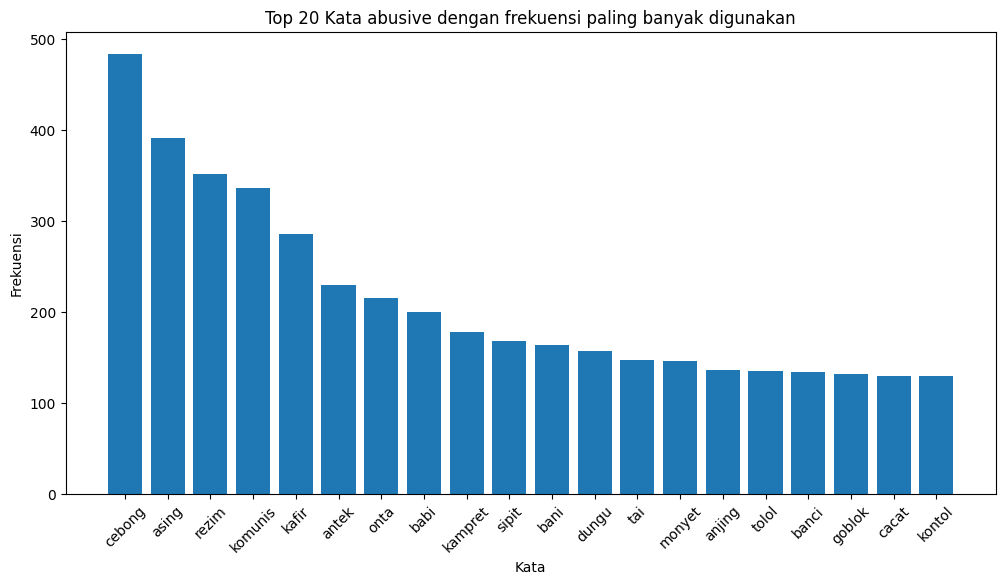

In [29]:
# Menghilangkan koma dari kata-kata dalam kolom 'kata_abusive'
df['kata_abusive'] = df['kata_abusive'].str.replace(',', '')

# Hitung frekuensi kata tanpa menghitung simbol "-" dalam kolom kata abusive yang ada dalam tabel proses analisis
word_counts = df['kata_abusive'].apply(lambda x: [word for word in x.split() if word != '-']).explode().value_counts()

# Ubah data frekuensi menjadi DataFrame
word_counts_df = pd.DataFrame({'Word': word_counts.index, 'Count': word_counts.values})

# Sort DataFrame berdasarkan frekuensi (opsional)
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(word_counts_df['Word'][:20], word_counts_df['Count'][:20])
plt.xticks(rotation=45)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Top 20 Kata abusive dengan frekuensi paling banyak digunakan')
plt.show()



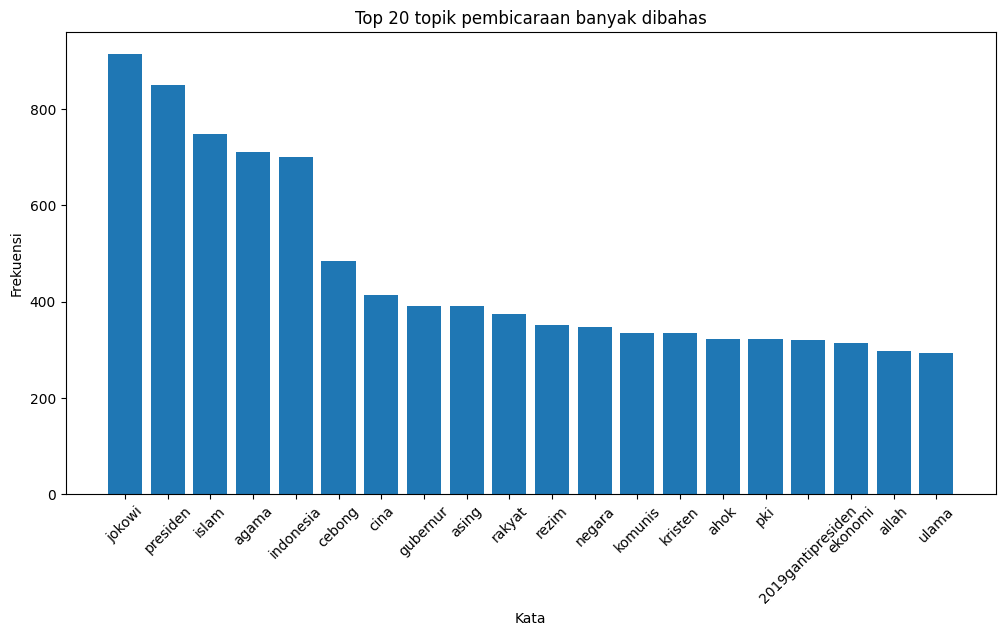

In [30]:
# Hitung frekuensi kata
word_counts = df['text_remove_stopwords'].str.split(expand=True).stack().value_counts()

# Ubah data frekuensi menjadi DataFrame
word_counts_df = pd.DataFrame({'Word': word_counts.index, 'Count': word_counts.values})

# Sort DataFrame berdasarkan frekuensi (opsional)
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(word_counts_df['Word'][:20], word_counts_df['Count'][:20])
plt.xticks(rotation=45)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Top 20 topik pembicaraan banyak dibahas')
plt.show()

In [31]:
# Menghitung jumlah twit yang mengandung kata abusive
jumlah_twit_abusive = df[df['jumlah_kata_abusive'] > 0]['id'].count()

# Menghitung total jumlah twit dalam dataset
total_jumlah_twit = df['id'].count()

# Menghitung persentase twit yang mengandung kata abusive
persentase_abusive = (jumlah_twit_abusive / total_jumlah_twit) * 100

# Cetak hasilnya
print(f'Jumlah twit yang mengandung kata abusive: {jumlah_twit_abusive}')
print(f'Persentase twit yang mengandung kata abusive: {persentase_abusive:.2f}%')

Jumlah twit yang mengandung kata abusive: 6366
Persentase twit yang mengandung kata abusive: 48.34%


In [75]:
# Menghitung korelasi antara kata-kata abusive dan topik obrolan menggunakan metode TF-IDF dan korelasi linear Pearson
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
# Fungsi untuk menghitung korelasi antara kata-kata abusive dan topik obrolan
def calculate_correlation(df):
    # Menggabungkan kata-kata abusive dari setiap twit menjadi satu string
    abusive_text = " ".join(df[df['jumlah_kata_abusive'] > 0]['text_remove_stopwords'])

    # Menggabungkan isi twit menjadi satu string
    all_text = " ".join(df['text_remove_stopwords'])

    # Membuat vektor TF-IDF untuk kata-kata abusive dan isi twit
    vectorizer = TfidfVectorizer()
    tfidf_matrix_abusive = vectorizer.fit_transform([abusive_text, all_text])

    # Menghitung korelasi antara kata-kata abusive dan isi twit
    correlation_matrix = linear_kernel(tfidf_matrix_abusive, tfidf_matrix_abusive)

    return correlation_matrix[0][1]

# Menghitung korelasi
correlation_score = calculate_correlation(df)

# Menampilkan hasil korelasi
print("Korelasi antara kata-kata abusive dan topik obrolan:", correlation_score)


Korelasi antara kata-kata abusive dan topik obrolan: 0.8154538747833233


In [77]:
#untuk melihat 5 kata yang menjadi topik dan 5 kata abusive yang selalu digunakan
from collections import Counter

# Menggabungkan semua isi twit menjadi satu string
all_text = " ".join(df['text_remove_stopwords'])

# Menghitung frekuensi setiap kata dalam twit
frekuensi_kata_twit = Counter(all_text.split())

# Mengambil 5 kata paling sering muncul dalam twit
kata_top_5_twit = [kata for kata, _ in frekuensi_kata_twit.most_common(5)]

# Menggabungkan semua kata abusive menjadi satu string
abusive_text = " ".join(df[df['jumlah_kata_abusive'] > 0]['text_remove_stopwords'])

# Menghitung frekuensi setiap kata abusive
frekuensi_kata_abusive = Counter(abusive_text.split())

# Mengambil 5 kata abusive paling sering muncul
kata_top_5_abusive = [kata for kata, _ in frekuensi_kata_abusive.most_common(5)]

print("5 Kata Paling Sering Muncul dalam Twit:")
print(kata_top_5_twit)

print("\n5 Kata Abusive Paling Sering Muncul:")
print(kata_top_5_abusive)


5 Kata Paling Sering Muncul dalam Twit:
['jokowi', 'presiden', 'islam', 'agama', 'indonesia']

5 Kata Abusive Paling Sering Muncul:
['cebong', 'asing', 'rezim', 'komunis', 'kafir']


In [33]:
#Menghitung korelasi panjang twit dan jumlah kata abusive
import pandas as pd
from scipy.stats import pearsonr

# Menambahkan kolom 'panjang_twit' yang berisi jumlah kata dalam setiap twit
df['panjang_twit'] = df['isi_twit'].apply(lambda x: len(x.split()))

# Menghitung korelasi antara panjang twit dan jumlah kata abusive
correlation, _ = pearsonr(df['panjang_twit'], df['jumlah_kata_abusive'])

print("Korelasi antara Panjang Twit dan Jumlah Kata Abusive:", correlation)


Korelasi antara Panjang Twit dan Jumlah Kata Abusive: 0.019824475827526635


In [34]:
#hitung frekensi kata yang menjadi topik
from collections import Counter

# Membuat list kosong untuk menyimpan kata-kata dalam kolom 'isi_twit' yang paling banyak mengandung kata abusif
kata_abusive_terbanyak = []

# Looping melalui setiap baris dalam data
for index, row in df.iterrows():
    # Memisahkan teks dalam kolom 'isi_twit' menjadi kata-kata
    kata = row['text_remove_stopwords'].split()
    # Menghindari kata-kata abusive dalam 'kata_abusive'
    kata = [k for k in kata if k not in row['kata_abusive'].split(',')]
    # Menambahkan kata-kata ke list
    kata_abusive_terbanyak.extend(kata)

# Menghitung frekuensi setiap kata
frekuensi_kata_abusive = Counter(kata_abusive_terbanyak)

# Menemukan 5 kata yang paling sering muncul berserta frekuensinya
kata_abusive_paling_sering = frekuensi_kata_abusive.most_common(5)

# Membuat DataFrame dari hasil
df_kata_abusive_paling_sering = pd.DataFrame(kata_abusive_paling_sering, columns=['Kata', 'Frekuensi'])

print(df_kata_abusive_paling_sering)

        Kata  Frekuensi
0     jokowi        914
1   presiden        850
2      islam        749
3      agama        710
4  indonesia        700


In [36]:
#merlihat penggunaan kata abusive sekaligus mengecek apakah ada kata yang berulang
from collections import Counter

# Membuat list kosong untuk menyimpan kata-kata dalam kolom 'isi_twit' yang paling banyak mengandung kata abusif
kata_abusive_terbanyak = []

# Looping melalui setiap baris dalam data
for index, row in df.iterrows():
    # Memisahkan teks dalam kolom 'isi_twit' menjadi kata-kata
    kata = row['text_remove_stopwords'].split()
    # Menghindari kata-kata abusive dalam 'kata_abusive'
    kata_abusive = row['kata_abusive'].split(',')
    # Menambahkan kata-kata abusif ke list
    kata_abusive_terbanyak.extend([k for k in kata if k in kata_abusive])

# Menghitung frekuensi setiap kata abusif
frekuensi_kata_abusive = Counter(kata_abusive_terbanyak)

# Menemukan 10 kata abusif yang paling sering muncul berserta frekuensinya
kata_abusive_paling_sering = frekuensi_kata_abusive.most_common(10)

# Membuat DataFrame dari hasil
df_kata_abusive_paling_sering = pd.DataFrame(kata_abusive_paling_sering, columns=['Kata Abusif', 'Frekuensi'])

print(df_kata_abusive_paling_sering)


  Kata Abusif  Frekuensi
0       asing        267
1       rezim        240
2      cebong        229
3     komunis        185
4       kafir        158
5        onta        146
6       sipit        140
7       cacat        113
8      monyet        101
9    bajingan         98
